## **WORKSHOP**

### **Visualization (Python)**

### <span style="background-color:yellow">**Matplotlib and Pyplot**</span>

Matplotlib is a Python library which allows us to create high-quality plots.

Pyplot is part of Matplotlib. Pyplot consists of many functions similar to Matlab/Octave ones. 

Files can be saved as vector graphics what is important in case of academic publishing.

- Docs: https://matplotlib.org/2.0.2/index.html

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

### **Basics**

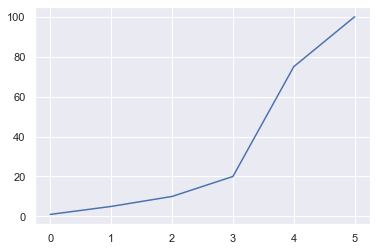

In [48]:
plt.plot([1, 5, 10, 20, 75, 100]) # matplotlib object is returned
plt.show() # Y values are plotted, X axis is zero-indexed.

In [49]:
x1 = np.linspace(5, 15, 101, retstep=True) # we create ndarray with 101 elements
print(x1[0])
x2 = np.arange(-5, 5, 0.5) # we create ndarray with step = 0.5
print(x2)

[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15. ]
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]


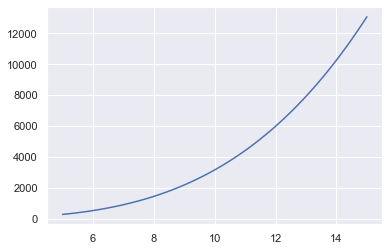

In [50]:
# let us use both X and Y values in plot()
y1 = x1[0] ** 3.5
plt.plot(x1[0], y1)

### **Plot formatting**

- Character & description, color abbreviations -> https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

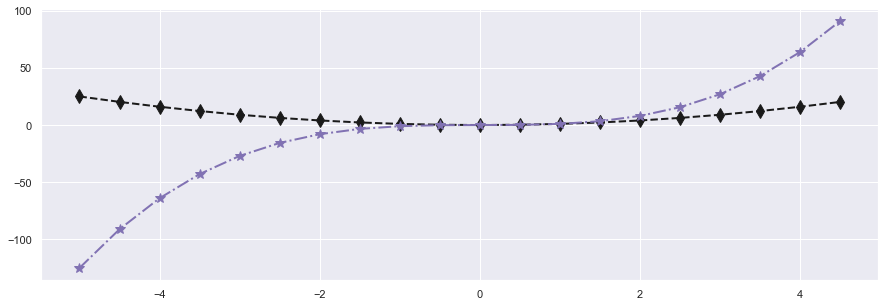

In [51]:
# The next step is to specify line style, marker style, etc.
# It is important in terms of academic publishing if we need monochromatic prints.
# Different style of each line allows to avoid unclear plots.
y2 = x2 ** 2
y3 = x2 ** 3
plt.figure(figsize=(15, 5))
plt.plot(x2, y2, "kd--",
         x2, y3, "m*-.",
         linewidth=2,
         markersize=10)
plt.show()

- Legend: <code>legend()</code>
- X and Y axes' ranges: <code>axis()</code>
- X and Y labels: <code>xlabel()</code>, <code>ylabel()</code>
- Saving to file: <code>savefig()</code>

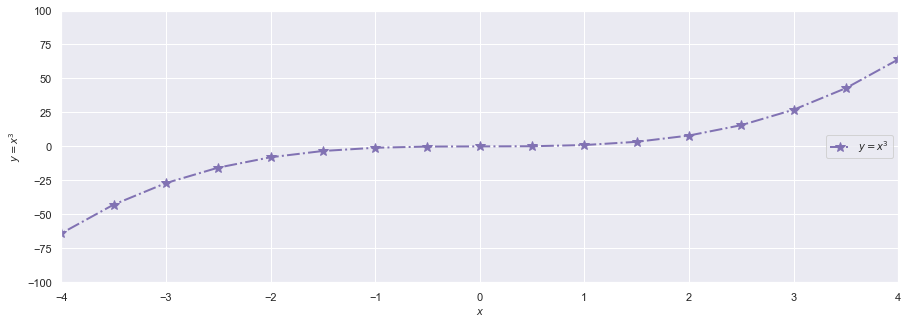

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(x2, y3, "m*-.",
         linewidth=2,
         markersize=10,
         label='$y=x^3$') # we can use LaTeX math expressions
plt.axis([-4, 4, -100, 100])
plt.grid(True)
fs = 10
plt.xlabel("$x$", 
           fontsize=fs) # we can use LaTeX math expressions
plt.ylabel("$y=x^3$", 
           fontsize=fs) # we can use LaTeX math expressions
plt.legend(loc="center right", 
           fontsize=fs)
plt.savefig("plot.pdf")
plt.show()

### **Logarithmic axes**

- <code>semilogx()</code> - X axis in log scale
- <code>semilogy()</code> - Y axis in log scale
- <code>loglog()</code> - both X and Y axes in log scale

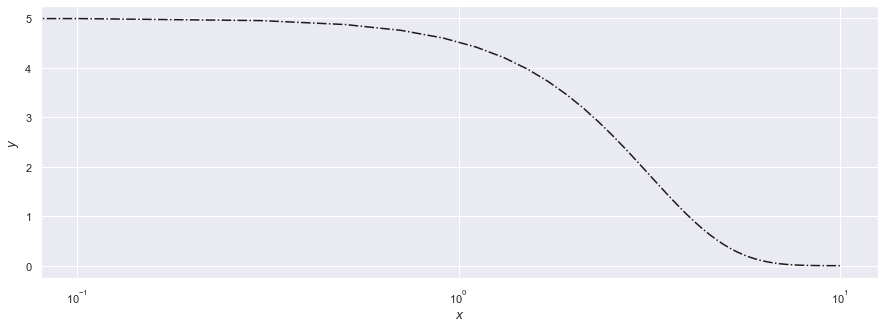

In [53]:
x5 = np.linspace(-10, 10, 100)
y5 = 5 * np.exp((-x5 ** 2) / 10)
plt.figure(figsize=(15, 5))
plt.semilogx(x5, y5, "k-.")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

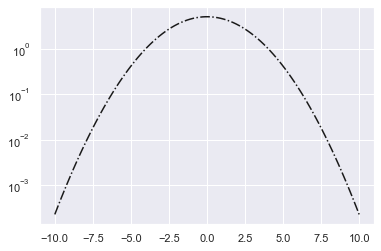

In [54]:
plt.semilogy(x5, y5, "k-.")
# or:
#plt.plot(y5, "k-.")
#plt.yscale('log')
plt.grid(True)
plt.show()

### **Subplots**

We can display multiple plots as subplots, within one figure.

For instance, if we want to display 8 subplots (4 x 2 grid), they will be numbered like this:

1 2

3 4

5 6

7 8


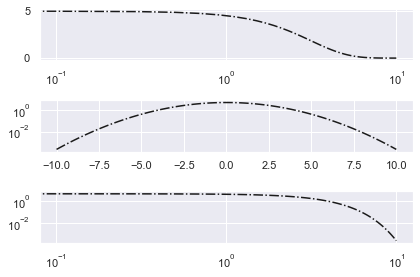

In [55]:
# Example: [3 x 1] grid
plt.figure()
plt.subplot(311) # each subplot number is: 31<current_plot_number>
plt.semilogx(x5, y5, "k-.")
plt.subplot(312)
plt.semilogy(x5, y5, "k-.")
plt.subplot(313)
plt.loglog(x5,y5,"k-.")
plt.tight_layout() # adjusts the padding between and around subplots
plt.show()

### **Histogram**

In [56]:
# Let us import the dataset from Kaggle 
# https://www.kaggle.com/sid321axn/beijing-multisite-airquality-data-set
data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data_2 = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv', sep=',')
data_3 = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')
data_full = data.append(data_2)
data_full = data_full.append(data_3) # merge 3 datasets
data.rename({'PM2.5': 'PM2_5'}, axis=1, inplace=True) # rename the column
# Fill nan values with median
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['NO2'].fillna(data['NO2'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [57]:
data.head(5) # Let us check first 5 rows

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [58]:
data2015 = data.loc[data['year'] == 2015] # Let us choose the data from 2015
data2015

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16104,16105,2015,1,1,0,13.0,50.0,19.0,29.0,500.0,28.0,-1.0,1027.0,-22.4,0.0,NNW,4.4,Aotizhongxin
16105,16106,2015,1,1,1,11.0,30.0,15.0,31.0,600.0,27.0,-1.0,1027.0,-23.7,0.0,N,5.6,Aotizhongxin
16106,16107,2015,1,1,2,13.0,33.0,16.0,32.0,600.0,26.0,-1.0,1028.0,-23.7,0.0,N,4.2,Aotizhongxin
16107,16108,2015,1,1,3,10.0,29.0,10.0,25.0,500.0,31.0,-1.0,1029.0,-24.4,0.0,N,4.4,Aotizhongxin
16108,16109,2015,1,1,4,12.0,25.0,14.0,33.0,700.0,24.0,-2.0,1027.0,-23.2,0.0,ENE,1.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,24860,2015,12,31,19,98.0,148.0,28.0,119.0,2600.0,7.0,-1.4,1026.3,-8.6,0.0,E,1.0,Aotizhongxin
24860,24861,2015,12,31,20,98.0,165.0,24.0,113.0,3300.0,8.0,-2.5,1026.2,-8.4,0.0,E,1.3,Aotizhongxin
24861,24862,2015,12,31,21,107.0,187.0,27.0,117.0,4000.0,10.0,-2.7,1025.8,-8.0,0.0,ENE,0.9,Aotizhongxin
24862,24863,2015,12,31,22,150.0,228.0,38.0,129.0,4900.0,12.0,-3.5,1025.5,-7.6,0.0,ENE,0.4,Aotizhongxin


---

To display the histograms, we may use <code>hist()</code> from Pandas library.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

One of this function's parameters is **kwargs - which is the unspecified number of keyword arguments from matplotlib's <code>hist()</code> function.
    
Docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

---

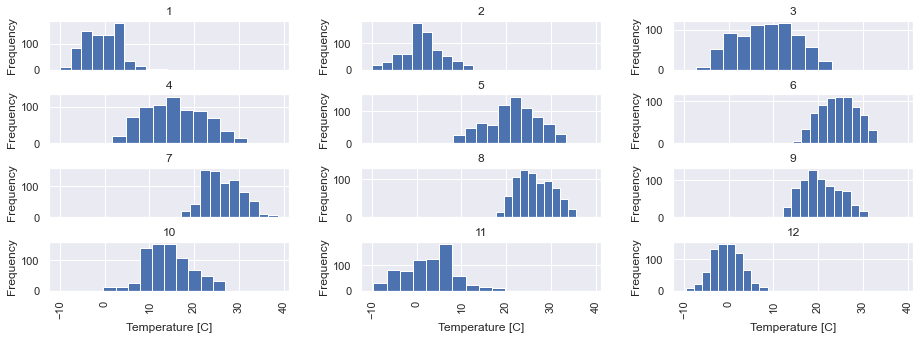

In [60]:
# Let us plot the temperature frequency by month in 2015
ax = data2015.hist(column='TEMP', by='month', bins=10, figsize=(15,5), sharex=True);
for axis in ax.flatten():
    axis.set_xlabel('Temperature [C]')
    axis.set_ylabel('Frequency')

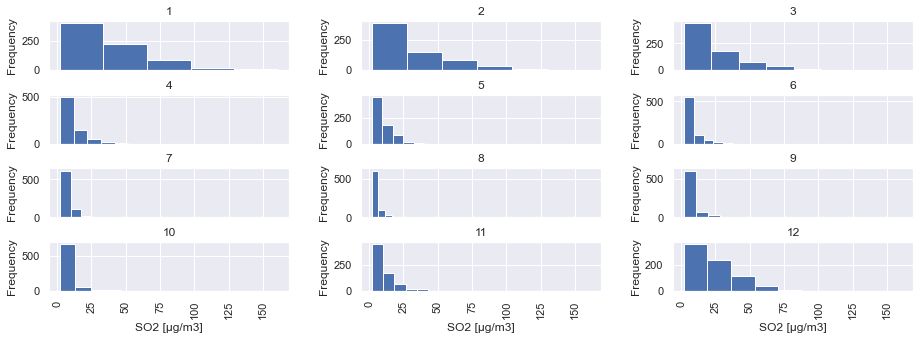

In [61]:
# Let us plot the SO2 concentration frequency by month in 2015
ax = data2015.hist(column='SO2', by='month', bins=5, figsize=(15,5), sharex=True);
for axis in ax.flatten():
    axis.set_xlabel('SO2 [µg/m3]')
    axis.set_ylabel('Frequency')

**More examples**:

- plot median value of PM10 concentration grouped by year

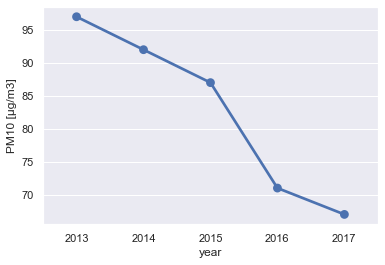

In [62]:
df = data[['PM10','year']].groupby(["year"]).median().reset_index()
sns.pointplot(x='year', y='PM10', data=df);
plt.ylabel("PM10 [µg/m3]");

- plot median value of temperature grouped by months of 2015

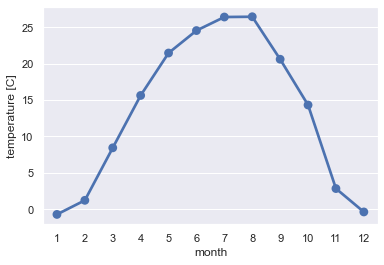

In [63]:
df = data2015[['TEMP','month']].groupby(["month"]).mean().reset_index()
sns.pointplot(x='month', y='TEMP', data=df);
plt.ylabel("temperature [C]");

**Scatter plots**

Docs: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

They visualize relationship between two features.

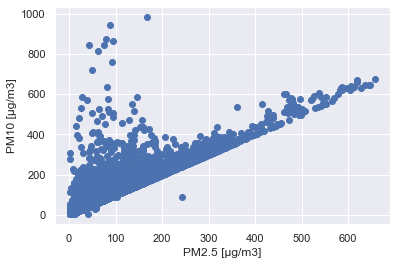

In [65]:
# What was the relationship between PM2.5 and PM10 in 2015?
plt.scatter(data2015.PM2_5,data2015.PM10);
plt.xlabel("PM2.5 [µg/m3]");
plt.ylabel("PM10 [µg/m3]");

**Box plots**

Docs: https://seaborn.pydata.org/generated/seaborn.boxplot.html

It is a graphical representation of the feature distribution.

The line in the center of the box is the median of the data.
The line to the left of the median is the first quartile, which is the median of the data to the left of the median.
The line to the right of the middle marks the third quartile, which is the median of the data to the right of the median.
The whiskers mark the minimum and maximum of the data.

A box plot allows to detect outliers and shows the skewness of data.

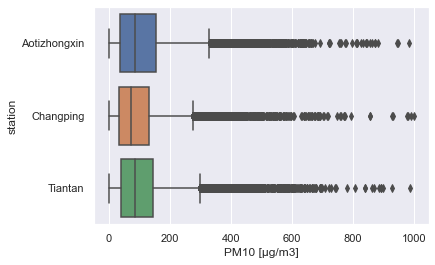

In [66]:
# Let us check PM10 distribution for different stations.
sns.boxplot(y=data_full["station"], x=data_full["PM10"]);
plt.xlabel("PM10 [µg/m3]");
plt.show()

### <span style="background-color:yellow">**Bqplot**</span>

Bqplot allows to create interactive plots.

https://pypi.org/project/bqplot/
https://github.com/bqplot/bqplot

Docs: https://bqplot.readthedocs.io/en/latest/index.html

In [67]:
# Interactive scatter plot
from bqplot import pyplot as plt
fig = plt.figure()
fig.layout.height = "300px"
fig.layout.width = "500px"
plt.scatter(data2015.PM2_5,data2015.PM10)
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

In [68]:
# More interactive plots
fig = plt.figure(title="Temperature versus month in 2015, station Aotizhongxin")
fig.layout.height = "300px"
fig.layout.width = "500px"
plt.plot(x=df['month'], y=df['TEMP'])
plt.ylabel("TEMP")
plt.xlabel("Month")
plt.show()
fig2 = plt.figure(title="Temperature versus month in 2015, station Aotizhongxin")
fig2.layout.height = "300px"
fig2.layout.width = "500px"
plt.plot(x=df['month'], y=df['TEMP'])
plt.ylabel("TEMP")
plt.xlabel("Month")
plt.show()

### <span style="background-color:yellow">**Plotly**</span>

Free open-source library which allows to create interactive plots.

Based on dash and plotly we can create interactive apps for data analysis.

Jupyter-dash allows us to do it via Jupyter Notebook.

Many helpful tutorials:

https://github.com/plotly/jupyter-dash/blob/master/notebooks/getting_started.ipynb

https://www.kaggle.com/mehmetkasap/data-visualization-tools-seaborn-and-plotly

https://www.statworx.com/at/blog/how-to-build-a-dashboard-in-python-plotly-dash-step-by-step-tutorial/

https://pbpython.com/plotly-dash-intro.html


In [69]:
# Let us write a simple app to compare PM10(PM2.5) relationships in selected years at the Aotizhongxin station
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

data2013 = data.loc[data['year'] == 2013]
data2016 = data.loc[data['year'] == 2016]

y2015 = go.Scatter(
                    x = data2015.PM2_5,
                    y = data2015.PM10,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text = "2015")
y2016 = go.Scatter(
                    x = data2016.PM2_5,
                    y = data2016.PM10,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text = "2016")
y2013 = go.Scatter(
                    x = data2013.PM2_5,
                    y = data2013.PM10,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'blue'),
                    text = "2013")

app = JupyterDash(__name__)
app.layout = html.Div(children=[
    html.H1(children='Air pollution at the Aotizhongxin station: PM10 vs PM2.5'),
    dcc.Graph(
        #id='pm-graph',
        figure={
            'data': [y2013, y2015, y2016],
            'layout':{
                'xaxis':{
                    'title': 'PM2.5 [µg/m3]'
                },
                'yaxis':{
                    'title': 'PM10 [µg/m3]'
                }
            }
        }
            )
]
                     )

app.run_server(mode="inline") # Let us run the app here